In [3]:
import pandas as pd

# Load the data
data = pd.read_csv('/content/car_price_prediction.xlsx - Sheet1.csv')
print(data.head())
print(data.info())
print(data.describe())


         ID  Price Manufacturer    Model  Prod. year   Category  \
0  45654403  13328        LEXUS   RX 450        2010       Jeep   
1  44731507  16621    CHEVROLET  Equinox        2011       Jeep   
2  45774419   8467        HONDA      FIT        2006  Hatchback   
3  45769185   3607         FORD   Escape        2011       Jeep   
4  45809263  11726        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0              Yes    Hybrid           3.5  186005 km          6   
1               No    Petrol             3  192000 km          6   
2               No    Petrol           1.3  200000 km          4   
3              Yes    Hybrid           2.5  168966 km          4   
4              Yes    Petrol           1.3   91901 km          4   

  Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0     Automatic          4x4  04-May        Left wheel  Silver       12  
1     Tiptronic          4x4  04-May    

**Univariate Analysis**

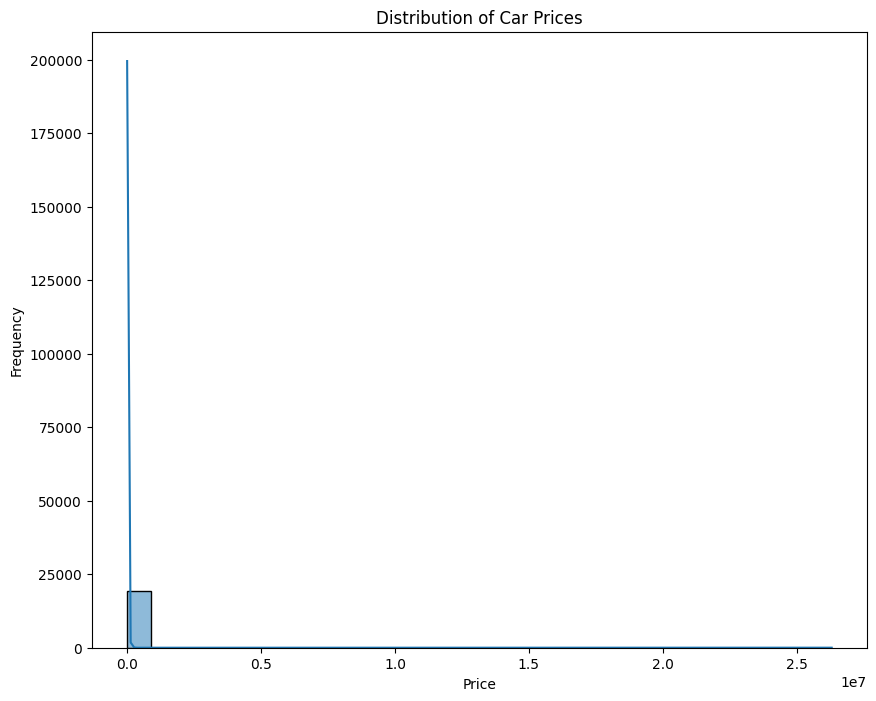

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.histplot(data['Price'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


**numerical features**

In [5]:
# Summary statistics for numerical features
print(data[['Prod. year', 'Mileage']].describe())


         Prod. year
count  19237.000000
mean    2010.912824
std        5.668673
min     1939.000000
25%     2009.000000
50%     2012.000000
75%     2015.000000
max     2020.000000


**Categorical Features**

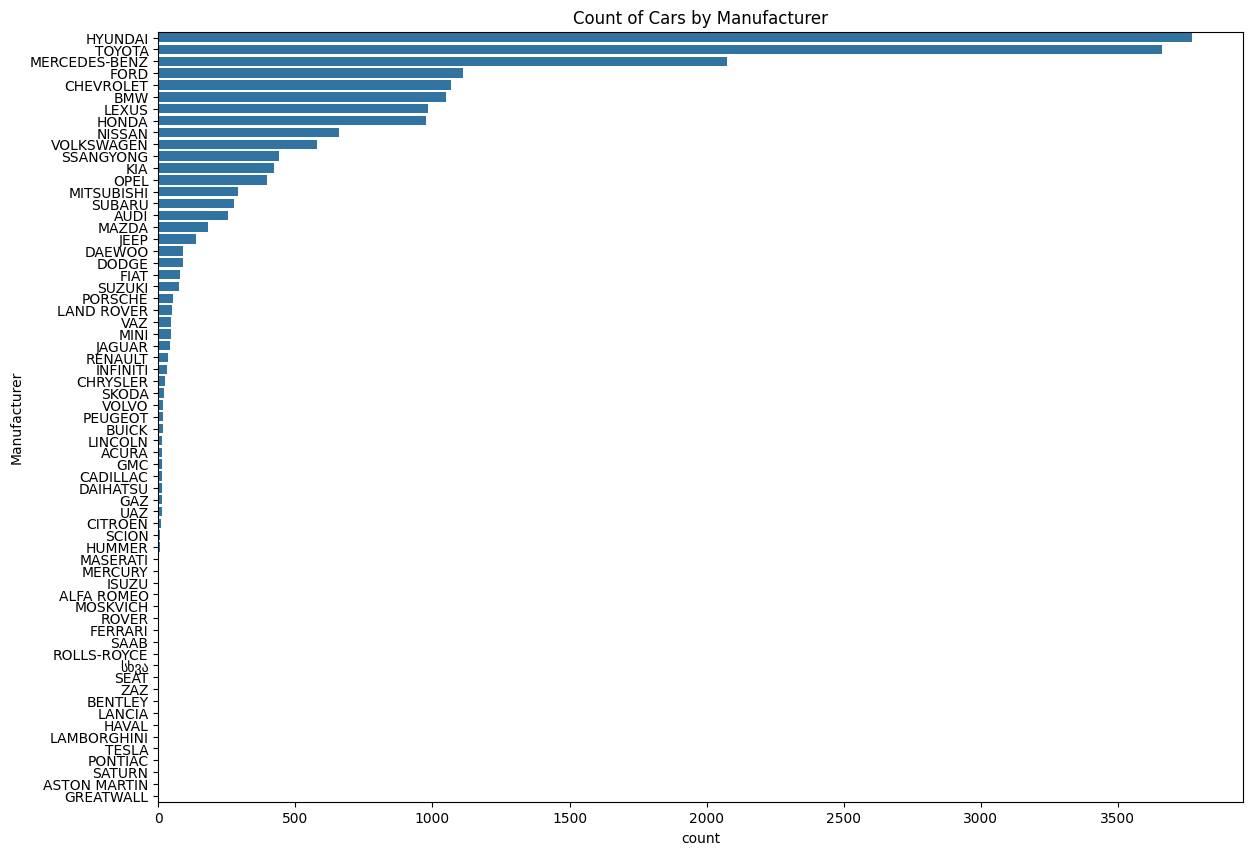

In [6]:
# Countplot for categorical features
plt.figure(figsize=(14, 10))
sns.countplot(y='Manufacturer', data=data, order=data['Manufacturer'].value_counts().index)
plt.title('Count of Cars by Manufacturer')
plt.show()


**Bivariate Analysis**

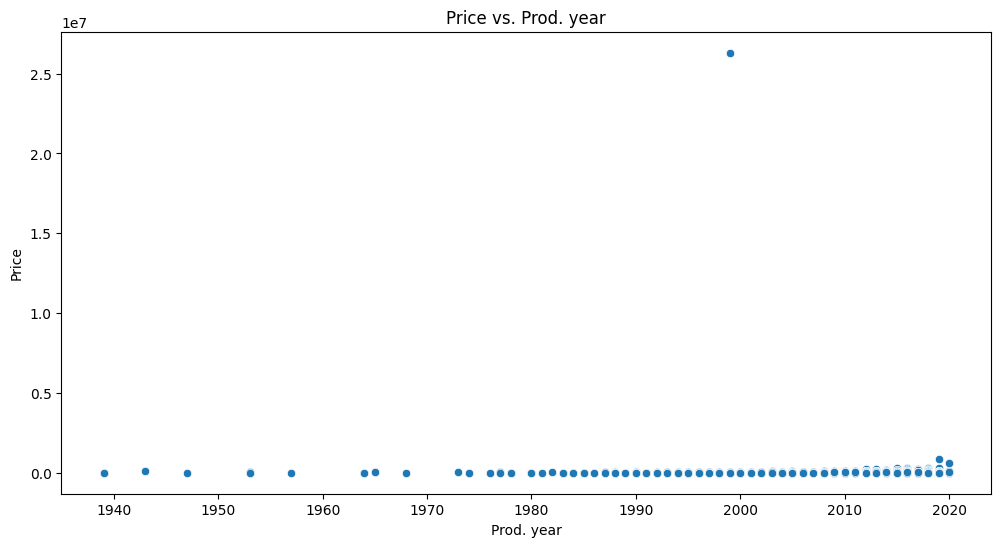

In [7]:
#price vs year
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Prod. year', y='Price', data=data)
plt.title('Price vs. Prod. year')
plt.xlabel('Prod. year')
plt.ylabel('Price')
plt.show()


**Price vs. Mileage**

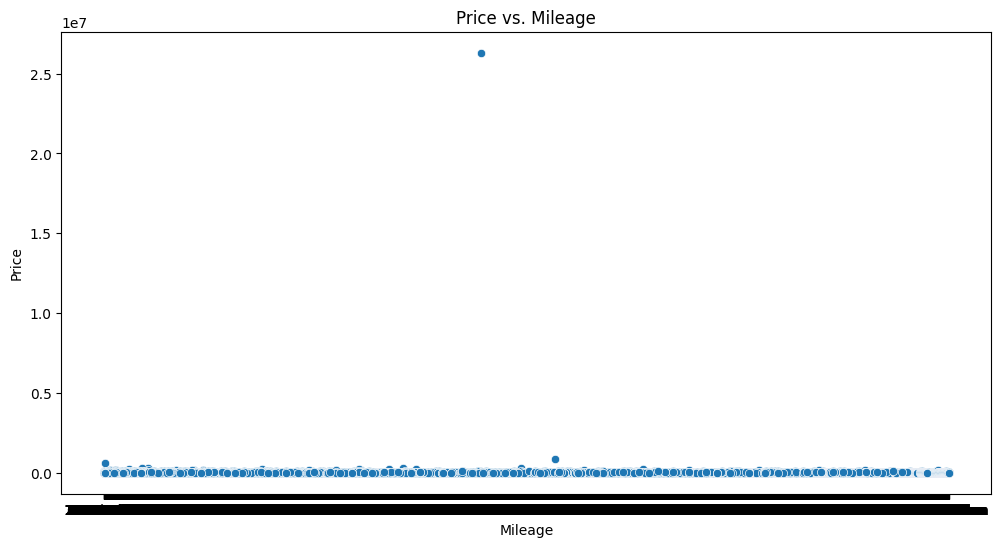

In [8]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Mileage', y='Price', data=data)
plt.title('Price vs. Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()


**Price vs. Brand**

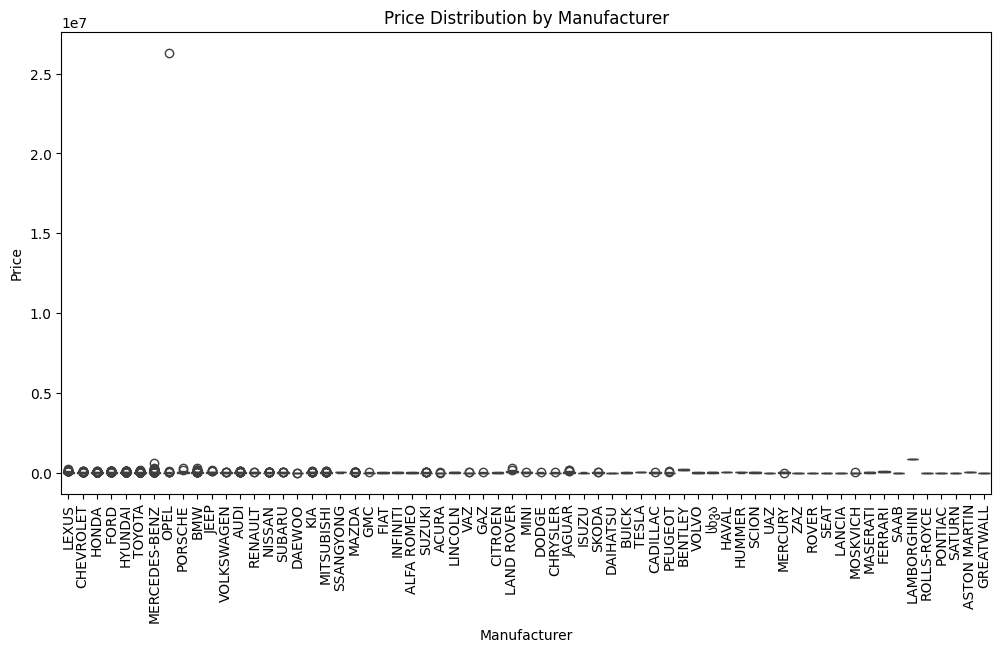

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Manufacturer', y='Price', data=data)
plt.title('Price Distribution by Manufacturer')
plt.xticks(rotation=90)
plt.show()


**Multivariate Analysis**
**Correlation Matrix**

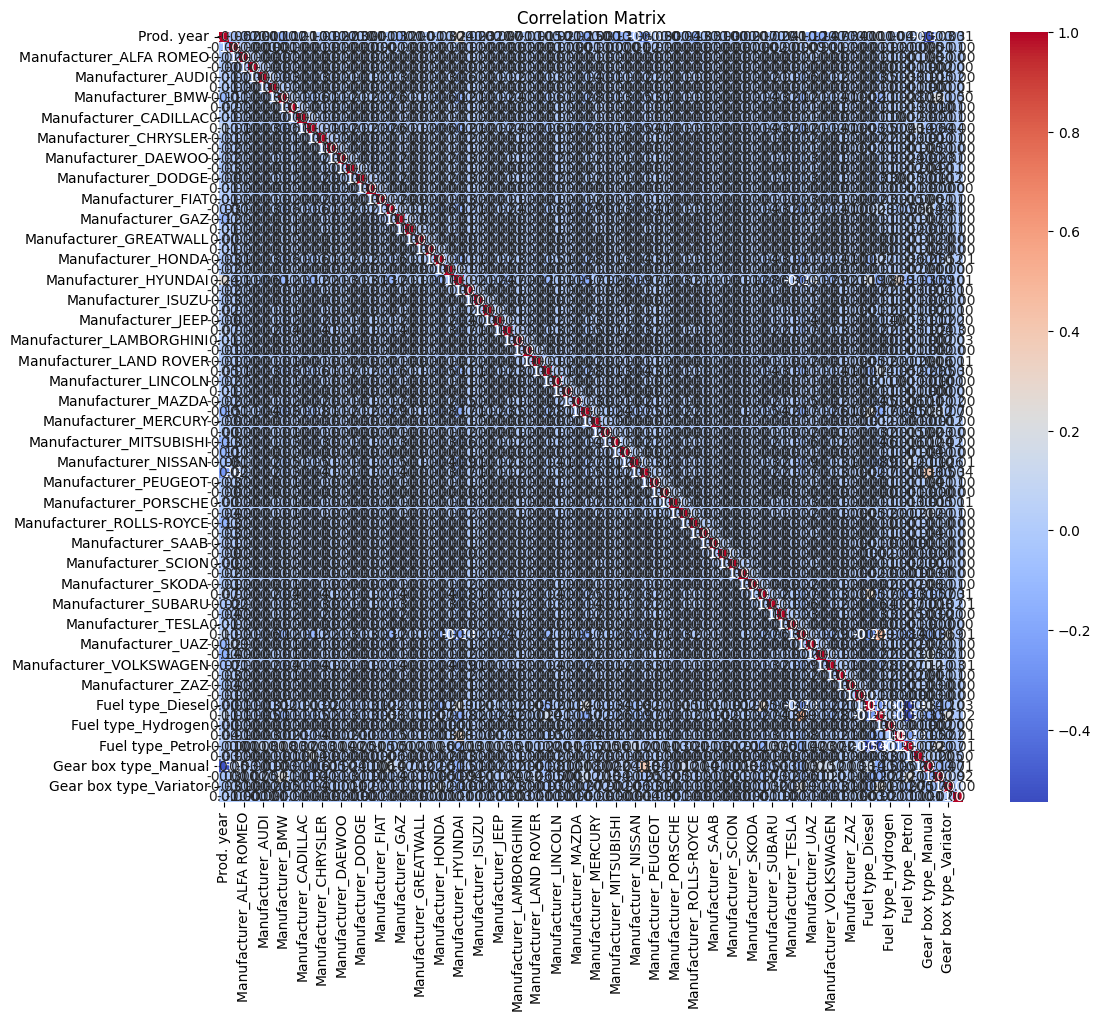

In [17]:
# Convert categorical features to numerical for correlation matrix
data_encoded = pd.get_dummies(data[['Prod. year', 'Mileage', 'Manufacturer', 'Fuel type', 'Gear box type']], drop_first=True)
data_encoded['Price'] = data['Price']

correlation_matrix = data_encoded.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


**Data Preprocessing Handling Missing Values**

In [12]:
# Check for missing values
print(data.isnull().sum())

# Example: Impute missing values if necessary
# Remove ' km' and convert to numeric before calculating the median
data['Mileage'] = data['Mileage'].str.replace(' km', '').astype(float)
data['Mileage'].fillna(data['Mileage'].median(), inplace=True)

ID                  0
Price               0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64


 **Encoding Categorical Variables**

In [18]:
# One-hot encoding
data_encoded = pd.get_dummies(data, columns=['Manufacturer', 'Fuel type', 'Gear box type'], drop_first=True)


 **Feature Scaling**

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_encoded[['Prod. year', 'Mileage']] = scaler.fit_transform(data_encoded[['Prod. year', 'Mileage']])


**Feature Engineering**

In [20]:
# Example: Age of the car
data_encoded['Car_Age'] = 2024 - data_encoded['Prod. year']
data_encoded.drop(columns=['Prod. year'], inplace=True)


**Model Building Train-Test Split**


In [25]:
from sklearn.model_selection import train_test_split

X = data_encoded.drop(columns=['Price'])
y = data_encoded['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Train Models Linear Regression**

In [27]:
# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Apply one-hot encoding
X_train = pd.get_dummies(X_train, columns=categorical_cols)
X_test = pd.get_dummies(X_test, columns=categorical_cols)

# Ensure both train and test sets have the same columns after encoding
X_train, X_test = X_train.align(X_test, join='outer', axis=1, fill_value=0)

# Create and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred_lr = lr_model.predict(X_test)
print("Linear Regression RMSE:", mean_squared_error(y_test, y_pred_lr, squared=False))
print("Linear Regression R^2:", r2_score(y_test, y_pred_lr))

Linear Regression RMSE: 48157.473964406
Linear Regression R^2: -6.442771164243821


**Random Forest**

In [28]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))
print("Random Forest R^2:", r2_score(y_test, y_pred_rf))


Random Forest RMSE: 9323.21433902538
Random Forest R^2: 0.7210421374440481


**Hyperparameter Tuning**


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

#print("Best Parameters:", grid_search.best_params_)
#best_model = grid_search.best_estimator_
#y_pred_best = best_model.predict(X_test)

#print("Best Model RMSE:", mean_squared_error(y_test, y_pred_best, squared=False))
#print("Best Model R^2:", r2_score(y_test, y_pred_best))


In [36]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
model = GradientBoostingRegressor()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=3,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_model.predict(X_test)
print("Best Model RMSE:", mean_squared_error(y_test, y_pred_best, squared=False))
print("Best Model R^2:", r2_score(y_test, y_pred_best))


Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best Model RMSE: 16560.848070174034
Best Model R^2: 0.11981813703869715
